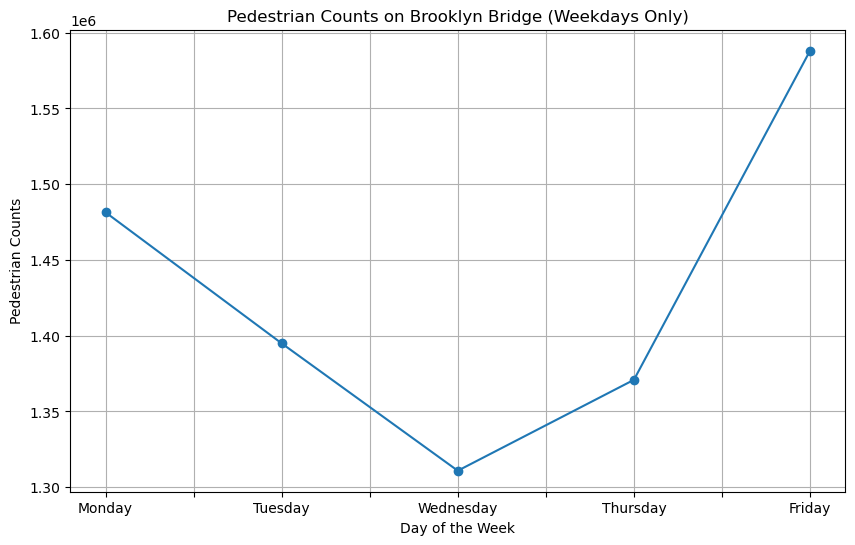

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

# Convert 'hour_beginning' to datetime
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

# Extract the day of the week from the datetime
df['DayOfWeek'] = df['hour_beginning'].dt.day_name()

# Filter for weekdays (Monday to Friday)
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekday_data = df[df['DayOfWeek'].isin(weekdays)]

# Group by day of the week and sum pedestrian counts
grouped_data = weekday_data.groupby('DayOfWeek')['Pedestrians'].sum().reindex(weekdays)

# Plot the data
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='line', marker='o')
plt.title('Pedestrian Counts on Brooklyn Bridge (Weekdays Only)')
plt.xlabel('Day of the Week')
plt.ylabel('Pedestrian Counts')
plt.grid(True)
plt.show()

weather_summary_clear-day              0.339758
weather_summary_clear-night           -0.377297
weather_summary_cloudy                -0.081255
weather_summary_fog                   -0.026457
weather_summary_partly-cloudy-day      0.497867
weather_summary_partly-cloudy-night   -0.282081
weather_summary_rain                  -0.138581
weather_summary_sleet                 -0.017091
weather_summary_snow                  -0.034052
weather_summary_wind                  -0.000170
Name: Pedestrians, dtype: float64


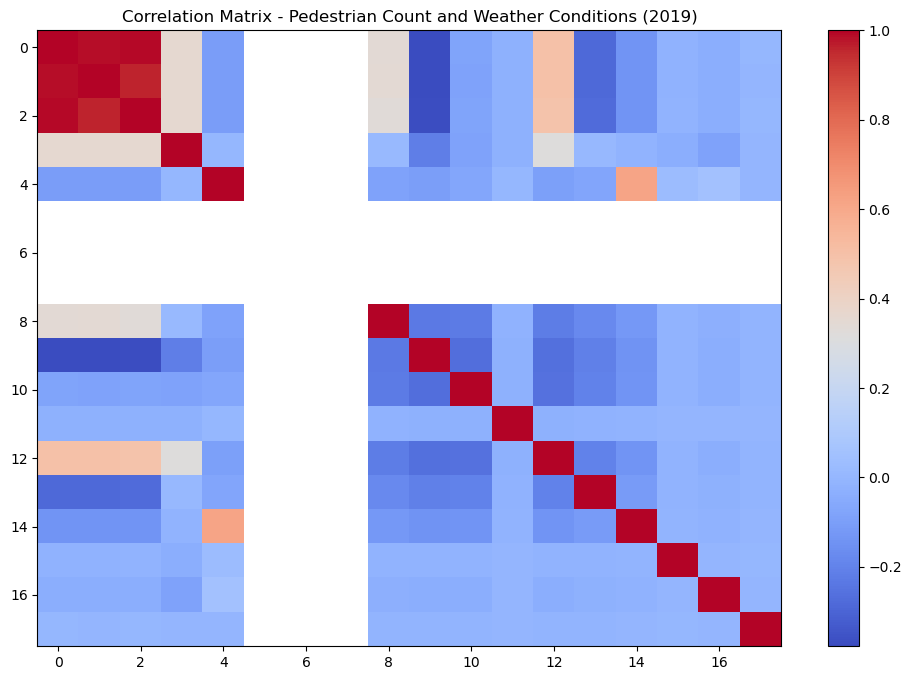

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume your data is already loaded as df
# Convert 'hour_beginning' to datetime
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

# Filter data for the year 2019
df['Year'] = df['hour_beginning'].dt.year
df_2019 = df[df['Year'] == 2019]

# Perform One-Hot Encoding on the 'weather_summary' column
df_2019_encoded = pd.get_dummies(df_2019, columns=['weather_summary'])

# Calculate the correlation matrix for pedestrian counts and weather conditions
correlation_matrix = df_2019_encoded.corr()

# Extract the correlation of pedestrian counts with different weather conditions
pedestrian_weather_corr = correlation_matrix['Pedestrians'].filter(like='weather_summary')

# Display correlation matrix for Pedestrian counts and Weather Summary
print(pedestrian_weather_corr)

# Plotting correlation matrix (optional)
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.title('Correlation Matrix - Pedestrian Count and Weather Conditions (2019)')
plt.show()

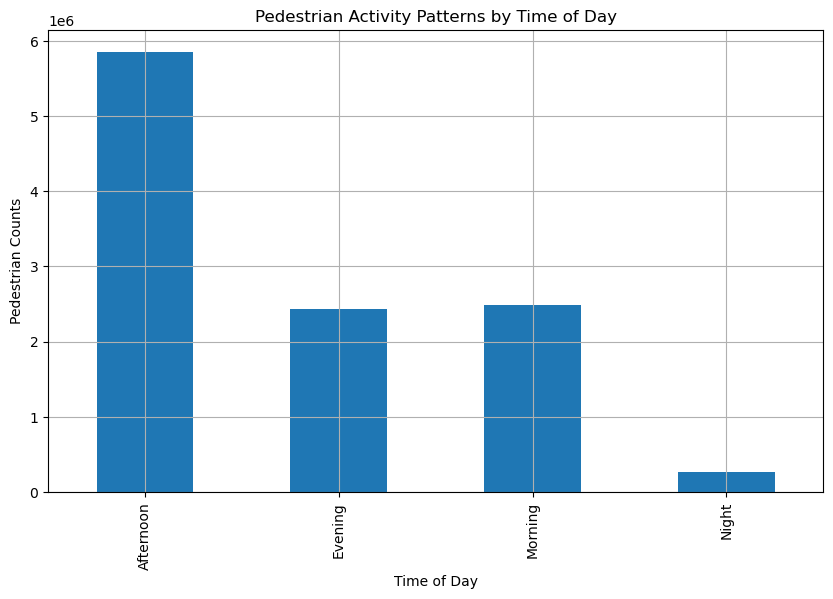

In [5]:
# Custom function to categorize time of day into morning, afternoon, evening, and night
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Extract the hour from 'hour_beginning'
df['Hour'] = df['hour_beginning'].dt.hour

# Apply the custom function to categorize time of day
df['TimeOfDay'] = df['Hour'].apply(categorize_time_of_day)

# Analyze pedestrian activity patterns based on time of day
time_of_day_data = df.groupby('TimeOfDay')['Pedestrians'].sum()

# Plot pedestrian counts by time of day
plt.figure(figsize=(10, 6))
time_of_day_data.plot(kind='bar')
plt.title('Pedestrian Activity Patterns by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Pedestrian Counts')
plt.grid(True)
plt.show()
